# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Samuel Anderson
- **Email:** muelson520@gmail.com
- **ID Dicoding:** samuel_anderson_DGQp

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
    * Jenis produk apa yang paling sering diorder dan jarang diorder pada E-commerce?
- Pertanyaan 
    * Bagaimana peforma E-commerce itu dari tahun ke tahun? Apakah menjadi sebuah marketplace yang terus bertumbuh dan layak dimasuki?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# Melihat current directory

In [3]:
current_dir = os.getcwd()

**Memuat tabel sellers**

In [4]:
sellers_df = pd.read_csv(os.path.join(current_dir,"data/sellers_dataset.csv"))

In [5]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Memuat tabel order items**

In [6]:
order_items_dataset_df = pd.read_csv(os.path.join(current_dir,"data/order_items_dataset.csv"))
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Memuat tabel products_dataset**

In [7]:
products_dataset_df = pd.read_csv(os.path.join(current_dir,"data/products_dataset.csv"))
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Memuat data products_category_translate_df**

In [8]:
products_category_name_translation_df = pd.read_csv(os.path.join(current_dir,"data/product_category_name_translation.csv"))
products_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Mengetahui tabel tabel yang akan digunakan beserta kolom-kolomnya untuk dilakukan penilaian data

### Assessing Data

**Menilai data sellers_df**

In [9]:
# Melihat data type sellers_df

In [10]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
# Menilai apakah ada duplikat

In [12]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
# Lihat parameter statistik dengan describe

In [14]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Menilai data order items**

In [15]:
# Melihat datatype order_items_dataset_df

In [16]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
# Menilai apakah ada duplikat

In [18]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
# Lihat parameter statistik dengan describe

In [20]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Menilai data products_dataset_df**

In [21]:
# Melihat datatype products_dataset_df

In [22]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
# Menilai apakah ada duplikat

In [24]:
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
# Melihat data apa saja yang kosong

In [26]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
# Lihat parameter statistik dengan describe

In [28]:
products_dataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Menilai data products_category_translate_df**

In [29]:
# Melihat info datatype

In [30]:
products_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
# Melihat duplikasi

In [32]:
products_category_name_translation_df.duplicated().sum()

np.int64(0)

In [33]:
# Melihat parameter statistik

In [34]:
products_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- sellers_df column name seller_zip_code_prefix harusnya tidak int karena itu mirip seperti kode khusus pos
- order_items_dataset_df pada bagian column shipping_limit_date seharusnya datetime
- adanya banyak kekosongan pada dataset products_dataset_df di product_category_name, product_name_lenght, product_description_lenght, product_photos_qty serta sedikit kekosongan pada product_weight_g, product_length_cm, product_height_cm, product_width_cm
- data products_category_name_translation_df sudah siap untuk digunakan, tidak perlu pembersihan

### Cleaning Data

#### Membersihkan data sellers_df

In [35]:
# Mengubah column jenis int pada seller_zip_code_prefix

In [36]:
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)

In [37]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


**Membersihkan order_items_dataset_df**

In [38]:
# Mengubah jenis data kolom shipping_limit_date menjadi datetime

In [39]:
order_items_dataset_df["shipping_limit_date"] = pd.to_datetime(order_items_dataset_df["shipping_limit_date"])
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Membersihkan products_dataset**

In [40]:
# Berhadapan dengan missing value dengan cara melihat missing value

In [41]:
# Lihat missing value 

In [42]:
 products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [43]:
# Melakukan imputation untuk product category_name

In [44]:
 products_dataset_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [45]:
products_dataset_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

C:\Users\S\AppData\Local\Temp\ipykernel_13836\727848689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)


In [46]:
# Melihat nama kategori produk yang sudah diisi beserta keterangannya

In [47]:
see_fill_product=products_dataset_df.loc[products_dataset_df["product_category_name"]=="cama_mesa_banho"]
see_fill_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,52.0,206.0,1.0,500.0,16.0,10.0,16.0
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,27.0,329.0,2.0,800.0,36.0,8.0,16.0
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45.0,206.0,1.0,650.0,16.0,10.0,16.0
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,56.0,509.0,4.0,6350.0,45.0,15.0,35.0


In [48]:
# Mengisi keterangan panjang nama, panjang deskripsi, dan kualitas foto yang masih kosong dengan mean

In [49]:
products_dataset_df.product_name_lenght.fillna(value=round(products_dataset_df["product_name_lenght"].mean()), inplace=True)
products_dataset_df.product_description_lenght.fillna(value=round(products_dataset_df["product_description_lenght"].mean()), inplace=True)
products_dataset_df.product_photos_qty.fillna(value=round(products_dataset_df["product_photos_qty"].mean()), inplace=True)

C:\Users\S\AppData\Local\Temp\ipykernel_13836\204875096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df.product_name_lenght.fillna(value=round(products_dataset_df["product_name_lenght"].mean()), inplace=True)
C:\Users\S\AppData\Local\Temp\ipykernel_13836\204875096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [50]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

**Insight:**
- Data sellers_df sudah bisa dilakukan EDA.
- Pengubahan telah dilakukan pada order_items_dataset_df, sehingga bisa dilakukan EDA.
- Melakukan pengisian pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty.

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi data sellers_df**

In [51]:
# Melakukan grup penjualan terbanyak dari kota apa

In [52]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

**Eksplorasi data order_items_dataset_df dan products_dataset_df**

In [53]:
orders_products_df = pd.merge(
    left=order_items_dataset_df,
    right=products_dataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


**Penggabungan orders_products_df dengan sellers_df**

In [54]:
orders_products_sellers_df = pd.merge(
    left=orders_products_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_products_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


**Penggabungan keseluruhan (ditambah products_category_name_translation_df)**

In [55]:
all_df = pd.merge(
    left=orders_products_sellers_df,
    right=products_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,garden_tools


**Insight:**
- Penggabungan keempat matriks untuk memudahkan kita melakukan visualisasi dan analisis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Jenis produk apa yang paling sering diorder pada E-commerce?

In [56]:
sum_orders_category_df = all_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
})
sum_orders_category_df.head()

,order_item_id
product_category_name_english,
agro_industry_and_commerce,265
air_conditioning,362
art,230
arts_and_craftmanship,26
audio,383


C:\Users\S\AppData\Local\Temp\ipykernel_13836\924186011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="order_item_id", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\S\AppData\Local\Temp\ipykernel_13836\924186011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


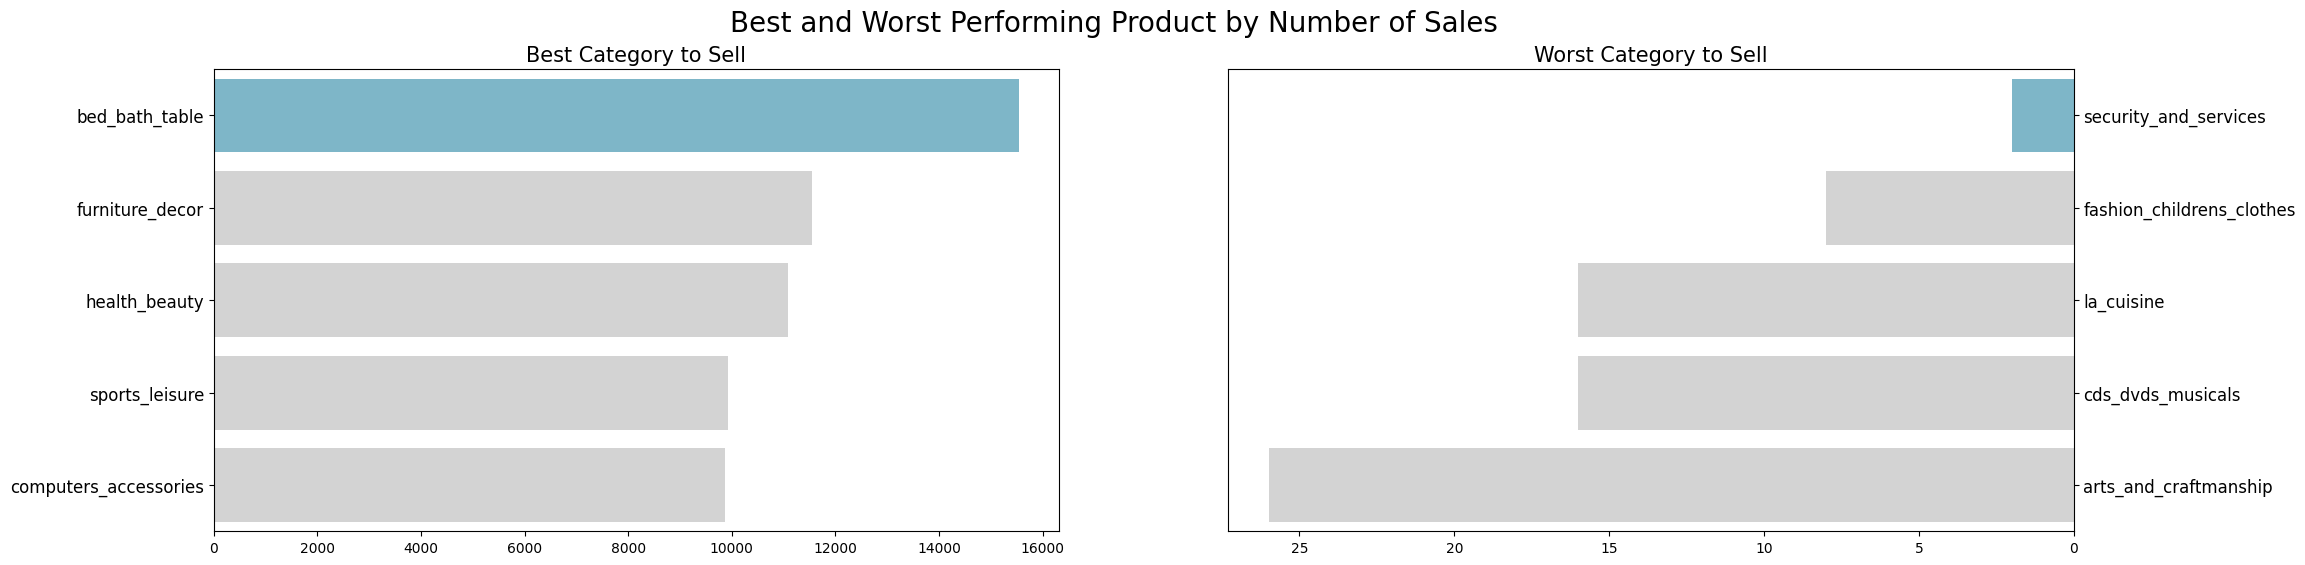

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="order_item_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Category to Sell", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Category to Sell", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2:

#### Bagaimana peforma E-commerce itu dari tahun ke tahun? Apakah menjadi sebuah marketplace yang terus bertumbuh dan layak dimasuki?

In [58]:
yearly_transaction_happen_df = all_df.resample(rule='Y', on='shipping_limit_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
yearly_transaction_happen_df.index = yearly_transaction_happen_df.index.strftime('%Y')
yearly_transaction_happen_df = yearly_transaction_happen_df.reset_index()
yearly_transaction_happen_df.rename(columns={
    "shipping_limit_date": "month",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
yearly_transaction_happen_df.head()

C:\Users\S\AppData\Local\Temp\ipykernel_13836\3574356479.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_transaction_happen_df = all_df.resample(rule='Y', on='shipping_limit_date').agg({


,month,order_count,revenue
0,2016,312,49785.92
1,2017,43580,6034868.58
2,2018,54771,7506643.24
3,2019,0,0.00
4,2020,3,345.96


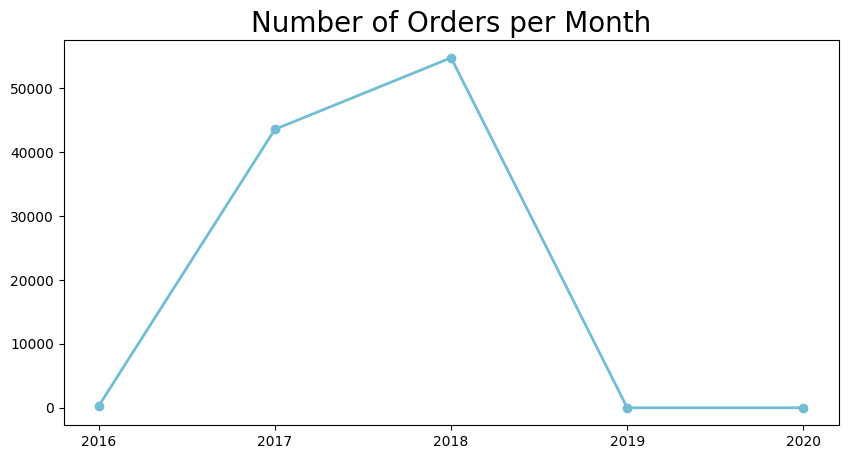

In [59]:
plt.figure(figsize=(10, 5)) 
plt.plot(yearly_transaction_happen_df["month"], yearly_transaction_happen_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

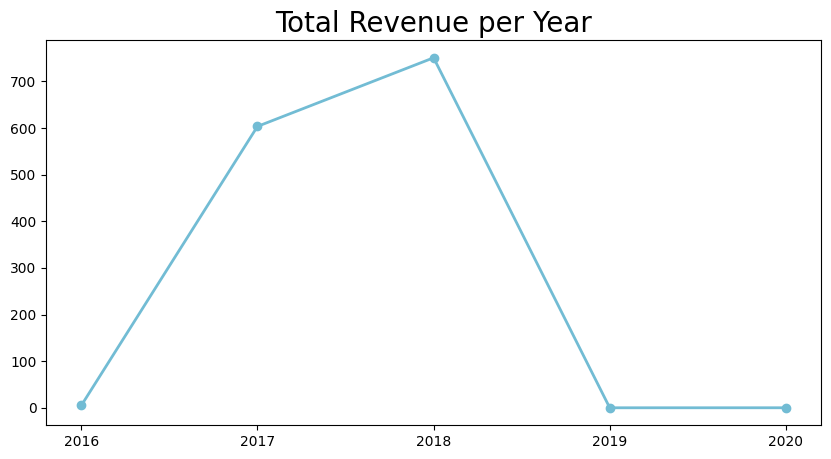

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_transaction_happen_df["month"],
    yearly_transaction_happen_df["revenue"]/10000,
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Didalam E-commerce produk yang paling laris adalah kategori bed_bath_table dan yang paling sedikit terjual adalah security_services
- Didapati bahwa order turun drastis pada tahun 2019 yang juga berdampak pada revenue, kemungkinan platform e-commerce itu tidak akan bangkit lagi di tahun-tahun yang akan datang sehingga tidak layak untuk dimasuki

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
   * Produk yang paling laris adalah kategori bed_bath_table dan yang paling sedikit terjual adalah security_services
- Conclution pertanyaan 2
   * Kemungkinan besar platform e-commerce itu tidak akan bangkit lagi di tahun-tahun yang akan datang sehingga tidak layak untuk dimasuki. Ini bisa dilihat dari order yang didapat dan revenuenya